## EXPERIMENTS


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from meld_graph.paths import EXPERIMENT_PATH
import os
#import seaborn as sns
from meld_graph.experiment import Experiment, discover_trained_experiments

Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1
Setting MELD_DATA_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting BASE_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments/co-ripa1/
Setting FS_SUBJECTS_PATH to 


In [2]:
# define plotting

import collections

def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)
            
def plot_scores(exps, score='loss', split='val', ax=None, title_prefix=''):
    # expects exps to be dict
    scores = []
    if ax is None:
        fig, ax = plt.subplots(1,1)
    for n, exp in sorted(exps.items(), key=lambda item: item[0]):
        scores = exp.get_scores(split=split)[score]
        ax.plot(scores.index, scores, label=n)
    ax.set_xlabel('epochs')
    ax.set_ylabel(score)
    ax.set_title(f'{title_prefix} {split} {score}')
    ax.legend()


**Aim: train model unet**

Fmodel (16,16,16) trained on 1000 synthetic subjects:
- radius: 2
- proportion_hemispheres_lesional: 0.9
- proportion_features_abnormal: 0.2
- smooth_lesion: True
- n_subtypes: 25
- use all controls

Parameters to vary:
- with and without deepsupervision + instance normalisation

Experiments:

### Load data

In [3]:
model_base_paths = {
    # models pretrain 
    'synt_unet_base': '/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/22-10-19_synth/unet/baseline/fold_00',
    'synt_unet_deepsup_instance': '/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/22-10-19_synth/unet/deepsuper_instance/fold_00',
    'synt_unet_deepsup' : '/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/22-10-19_synth/unet/deepsuper/fold_00',
    'synt_unet_deepsup_instance_augment': '/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/22-10-19_synth/unet/deepsuper_instance_augment/fold_00',
    'synt_3layers' : '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/22-10-18_synth/3layers/baseline/fold_00'
    # model finetuned    
}

# process paths to get nice descriptive model names and load experiments
models_dict = {}
for name, path in model_base_paths.items():
    name_dict = {}
    name_dict[name] = Experiment.from_folder(path)
    models_dict[name] = name_dict
print(models_dict)

Initialised Experiment 22-10-18_synth/unet/baseline
Initialised Experiment 22-10-18_synth/unet/deepsuper_instance
Initialised Experiment 22-10-19_synth/unet/deepsuper
Initialised Experiment 22-10-18_synth/3layers/baseline


{'synt_unet_base': {'synt_unet_base': <meld_graph.experiment.Experiment object at 0x2b1628fd0100>}, 'synt_unet_deepsup_instance': {'synt_unet_deepsup_instance': <meld_graph.experiment.Experiment object at 0x2b14a9628e80>}, 'synt_unet_deepsup': {'synt_unet_deepsup': <meld_graph.experiment.Experiment object at 0x2b14a9628c40>}, 'synt_3layers': {'synt_3layers': <meld_graph.experiment.Experiment object at 0x2b14a9632580>}}


### Plot data

/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/22-10-18_synth/unet/baseline/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/22-10-18_synth/unet/baseline/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/22-10-18_synth/unet/deepsuper_instance/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/22-10-18_synth/unet/deepsuper_instance/fold_00


Experiment is not trained, no scores available


/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/22-10-19_synth/unet/deepsuper/fold_00


TypeError: 'NoneType' object is not subscriptable

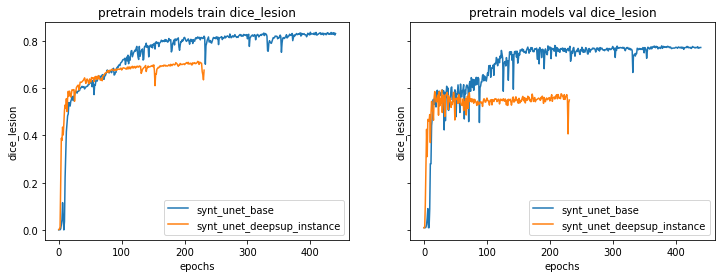

In [4]:
# model unet pretrain synth baseline vs deepsupervision+instance normalisation
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=True)
plot_scores(models_dict['synt_unet_base'], 'dice_lesion', split='train', ax=axes[0], title_prefix='pretrain models')
plot_scores(models_dict['synt_unet_base'], 'dice_lesion', split='val', ax=axes[1], title_prefix='pretrain models')

plot_scores(models_dict['synt_unet_deepsup_instance'], 'dice_lesion', split='train', ax=axes[0], title_prefix='pretrain models')
plot_scores(models_dict['synt_unet_deepsup_instance'], 'dice_lesion', split='val', ax=axes[1], title_prefix='pretrain models')

plot_scores(models_dict['synt_unet_deepsup_instance_augment'], 'dice_lesion', split='train', ax=axes[0], title_prefix='pretrain models')
plot_scores(models_dict['synt_unet_deepsup_instance_augment'], 'dice_lesion', split='val', ax=axes[1], title_prefix='pretrain models')

plot_scores(models_dict['synt_unet_deepsup'], 'dice_lesion', split='train', ax=axes[0], title_prefix='pretrain models')
plot_scores(models_dict['synt_unet_deepsup'], 'dice_lesion', split='val', ax=axes[1], title_prefix='pretrain models')

plot_scores(models_dict['synt_3layers'], 'dice_lesion', split='train', ax=axes[0], title_prefix='pretrain models')
plot_scores(models_dict['synt_3layers'], 'dice_lesion', split='val', ax=axes[1], title_prefix='pretrain models')

**Aim: train model on smoothed and non smoothed data**

Fmodel (16,16,16) trained on 1000 synthetic subjects:
- radius: 2
- proportion_hemispheres_lesional: 0.9
- proportion_features_abnormal: 0.2
- smooth_lesion: True
- n_subtypes: 25
- use all controls

Parameters to vary:
- features smoothed with kernel 3 or kernel 10

Experiments:

### load data

In [21]:
model_base_paths = {
    # models pretrain 
    'pretrain_synt_kernel10': '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/22-10-17_synth/conv-16-16-16/baseline-prop_features0.2/nsub1000/fold_00',
    'pretrain_synt_kernel3': '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/22-10-17_synth_kernel3/baseline-prop_features0.2/nsub1000/fold_00',
    # model finetuned 
    'finetuned_synt_kernel10': '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/22-10-17_synth/conv-16-16-16/finetune-radius0.5/nsub1000/fold_00/',
    'finetuned_real_kernel3': '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/22-10-17_synth_kernel3/finetuning_realdata/fold_00/',

   
}

# process paths to get nice descriptive model names and load experiments
models_dict = {}
for name, path in model_base_paths.items():
    name_dict = {}
    name_dict[name] = Experiment.from_folder(path)
    models_dict[name] = name_dict
print(models_dict)

Initialised Experiment 22-10-17_synth/conv-16-16-16/baseline-prop_features0.2/nsub1000
Initialised Experiment 22-10-17_synth_kernel3/baseline-prop_features0.2/nsub1000
Initialised Experiment 22-10-17_synth/conv-16-16-16/finetune-radius0.5/nsub1000
Initialised Experiment 22-10-17_synth_kernel3/finetuning_realdata


{'pretrain_synt_kernel10': {'pretrain_synt_kernel10': <meld_graph.experiment.Experiment object at 0x2b9f26c06bb0>}, 'pretrain_synt_kernel3': {'pretrain_synt_kernel3': <meld_graph.experiment.Experiment object at 0x2b9f26b4e7f0>}, 'finetuned_synt_kernel10': {'finetuned_synt_kernel10': <meld_graph.experiment.Experiment object at 0x2b9f26b4e160>}, 'finetuned_real_kernel3': {'finetuned_real_kernel3': <meld_graph.experiment.Experiment object at 0x2b9f26b48d60>}}


In [12]:
# available scores
#models_dict['3layer']['baseline_nosmooth'].get_scores(split='val')

## Plot data

### pretrain model

/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/22-10-17_synth_kernel3/baseline-prop_features0.2/nsub1000/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/22-10-17_synth_kernel3/baseline-prop_features0.2/nsub1000/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/22-10-17_synth/conv-16-16-16/baseline-prop_features0.2/nsub1000/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/22-10-17_synth/conv-16-16-16/baseline-prop_features0.2/nsub1000/fold_00


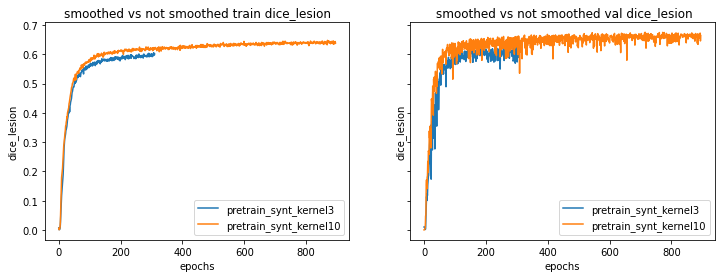

In [15]:
# model smoothed vs not smoothed
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=True)
plot_scores(models_dict['pretrain_synt_kernel3'], 'dice_lesion', split='train', ax=axes[0], title_prefix=' smoothed vs not smoothed')
plot_scores(models_dict['pretrain_synt_kernel3'], 'dice_lesion', split='val', ax=axes[1], title_prefix='smoothed vs not smoothed')

plot_scores(models_dict['pretrain_synt_kernel10'], 'dice_lesion', split='train', ax=axes[0], title_prefix='smoothed vs not smoothed')
plot_scores(models_dict['pretrain_synt_kernel10'], 'dice_lesion', split='val', ax=axes[1], title_prefix=' smoothed vs not smoothed')

/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/22-10-17_synth/conv-16-16-16/baseline-prop_features0.2/nsub1000/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/22-10-17_synth/conv-16-16-16/baseline-prop_features0.2/nsub1000/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/22-10-17_synth/conv-16-16-16/finetune-radius0.5/nsub1000/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/22-10-17_synth/conv-16-16-16/finetune-radius0.5/nsub1000/fold_00


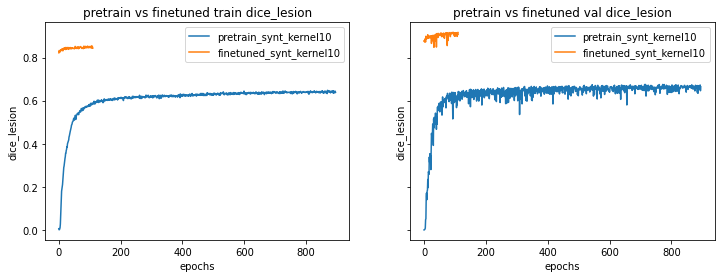

In [16]:
# pretrain on smooth and finetuned on smaller synt lesion
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=True)
plot_scores(models_dict['pretrain_synt_kernel10'], 'dice_lesion', split='train', ax=axes[0], )
plot_scores(models_dict['pretrain_synt_kernel10'], 'dice_lesion', split='val', ax=axes[1])

plot_scores(models_dict['finetuned_synt_kernel10'], 'dice_lesion', split='train', ax=axes[0], title_prefix='pretrain vs finetuned')
plot_scores(models_dict['finetuned_synt_kernel10'], 'dice_lesion', split='val', ax=axes[1], title_prefix='pretrain vs finetuned')

/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/22-10-17_synth_kernel3/baseline-prop_features0.2/nsub1000/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/22-10-17_synth_kernel3/baseline-prop_features0.2/nsub1000/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/22-10-17_synth_kernel3/finetuning_realdata/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1/22-10-17_synth_kernel3/finetuning_realdata/fold_00


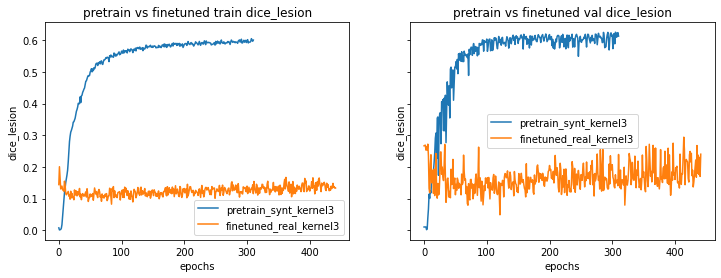

In [17]:
# pretrain on non-smooth and finetuned on real data
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=True)
plot_scores(models_dict['pretrain_synt_kernel3'], 'dice_lesion', split='train', ax=axes[0], )
plot_scores(models_dict['pretrain_synt_kernel3'], 'dice_lesion', split='val', ax=axes[1])

plot_scores(models_dict['finetuned_real_kernel3'], 'dice_lesion', split='train', ax=axes[0], title_prefix='pretrain vs finetuned')
plot_scores(models_dict['finetuned_real_kernel3'], 'dice_lesion', split='val', ax=axes[1], title_prefix='pretrain vs finetuned')